<a href="https://colab.research.google.com/github/hosituanit/ImageProcessingServer/blob/master/kount002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://icdn.dantri.com.vn/thumb_w/640/2019/12/13/kinh-nghiedocx-1576230100477.jpeg

--2021-03-14 06:04:30--  https://icdn.dantri.com.vn/thumb_w/640/2019/12/13/kinh-nghiedocx-1576230100477.jpeg
Resolving icdn.dantri.com.vn (icdn.dantri.com.vn)... 123.30.168.3
Connecting to icdn.dantri.com.vn (icdn.dantri.com.vn)|123.30.168.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123864 (121K) [image/jpeg]
Saving to: ‘kinh-nghiedocx-1576230100477.jpeg.1’

kinh-nghiedocx-1576 100%[===================>] 120.96K   330KB/s    in 0.4s    

2021-03-14 06:04:32 (330 KB/s) - ‘kinh-nghiedocx-1576230100477.jpeg.1’ saved [123864/123864]



In [73]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

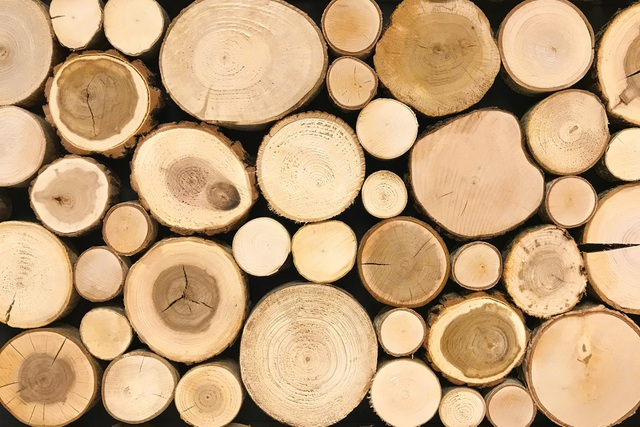

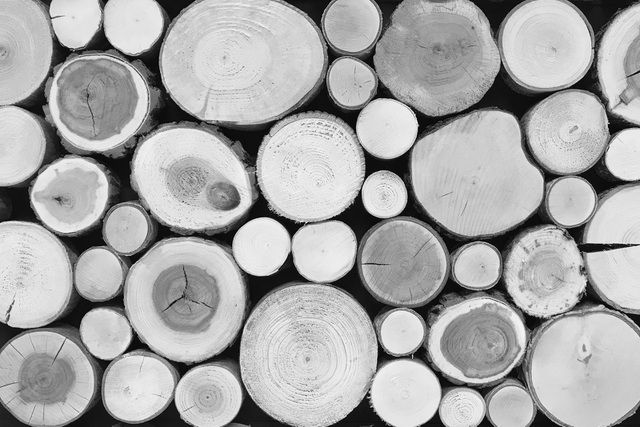

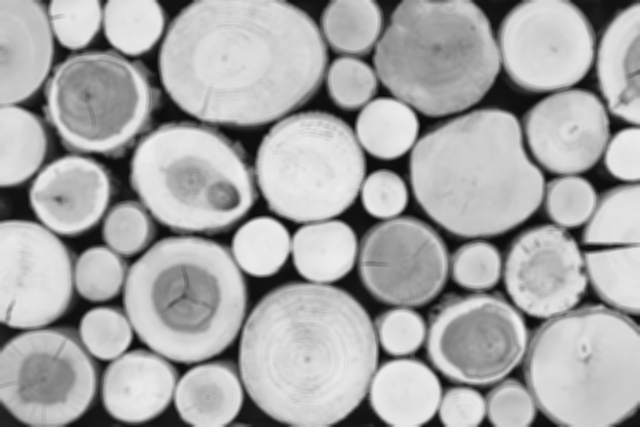

In [74]:
img = cv2.imread('kinh-nghiedocx-1576230100477.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blured = cv2.blur(gray,(5,5))
ret, thresh = cv2.threshold(blured,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2_imshow(img)
cv2_imshow(gray)
cv2_imshow(blured)


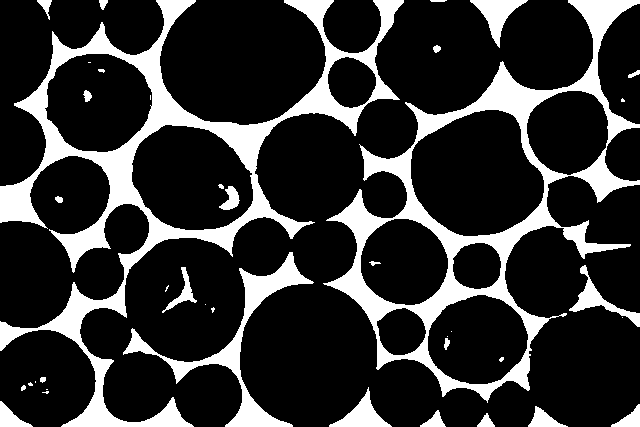

In [75]:
cv2_imshow(thresh)

(854, 1280)


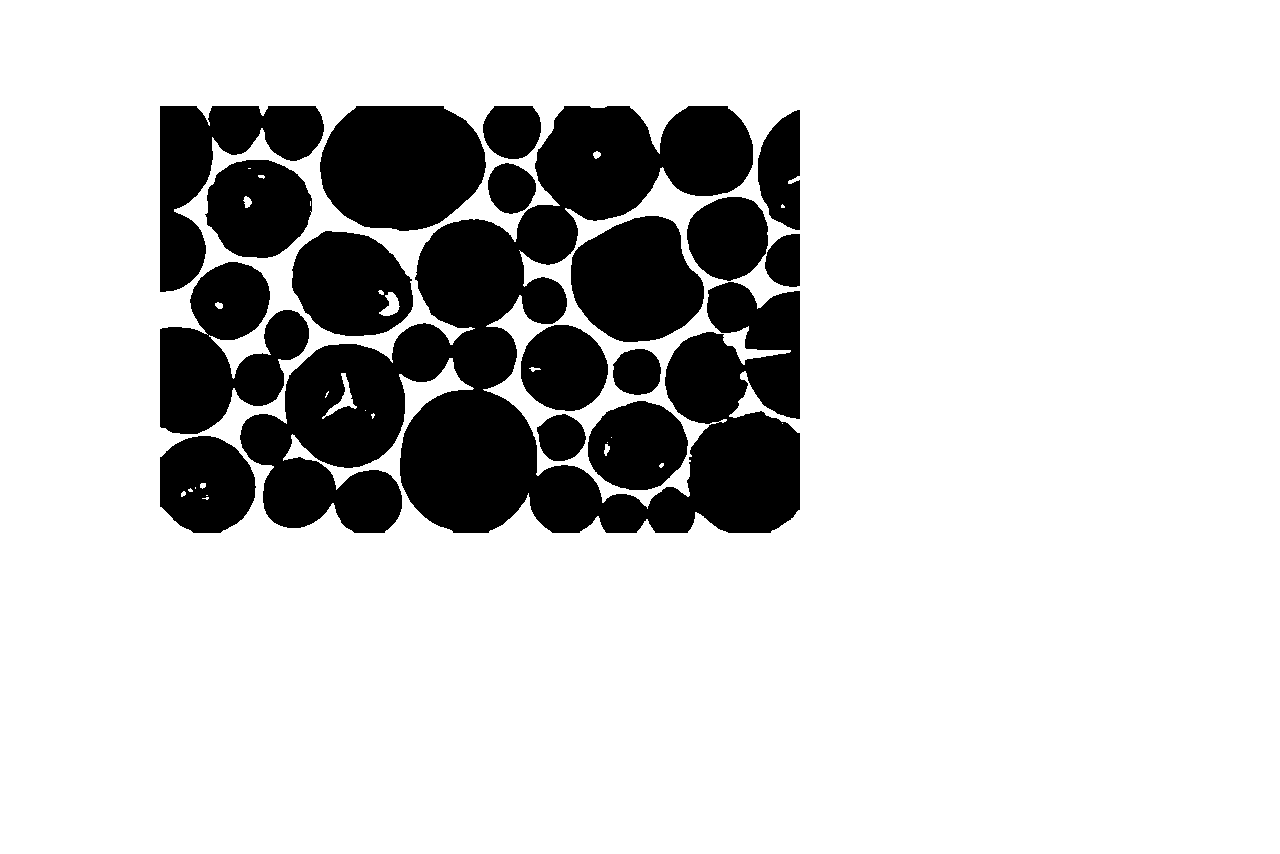

In [76]:

w,h = thresh.shape
big = np.zeros((w*2,h*2),np.uint8)
big = cv2.bitwise_not(big)
print(big.shape)
def paste_slices(tup):
  pos, w, max_w = tup
  wall_min = max(pos, 0)
  wall_max = min(pos+w, max_w)
  block_min = -min(pos, 0)
  block_max = max_w-max(pos+w, max_w)
  block_max = block_max if block_max != 0 else None
  return slice(wall_min, wall_max), slice(block_min, block_max)

def paste(wall, block, loc):
  loc_zip = zip(loc, block.shape, wall.shape)
  wall_slices, block_slices = zip(*map(paste_slices, loc_zip))
  wall[wall_slices] = block[block_slices]
paste(big, thresh, (int(w/4), int(h/4)))

cv2_imshow(big)

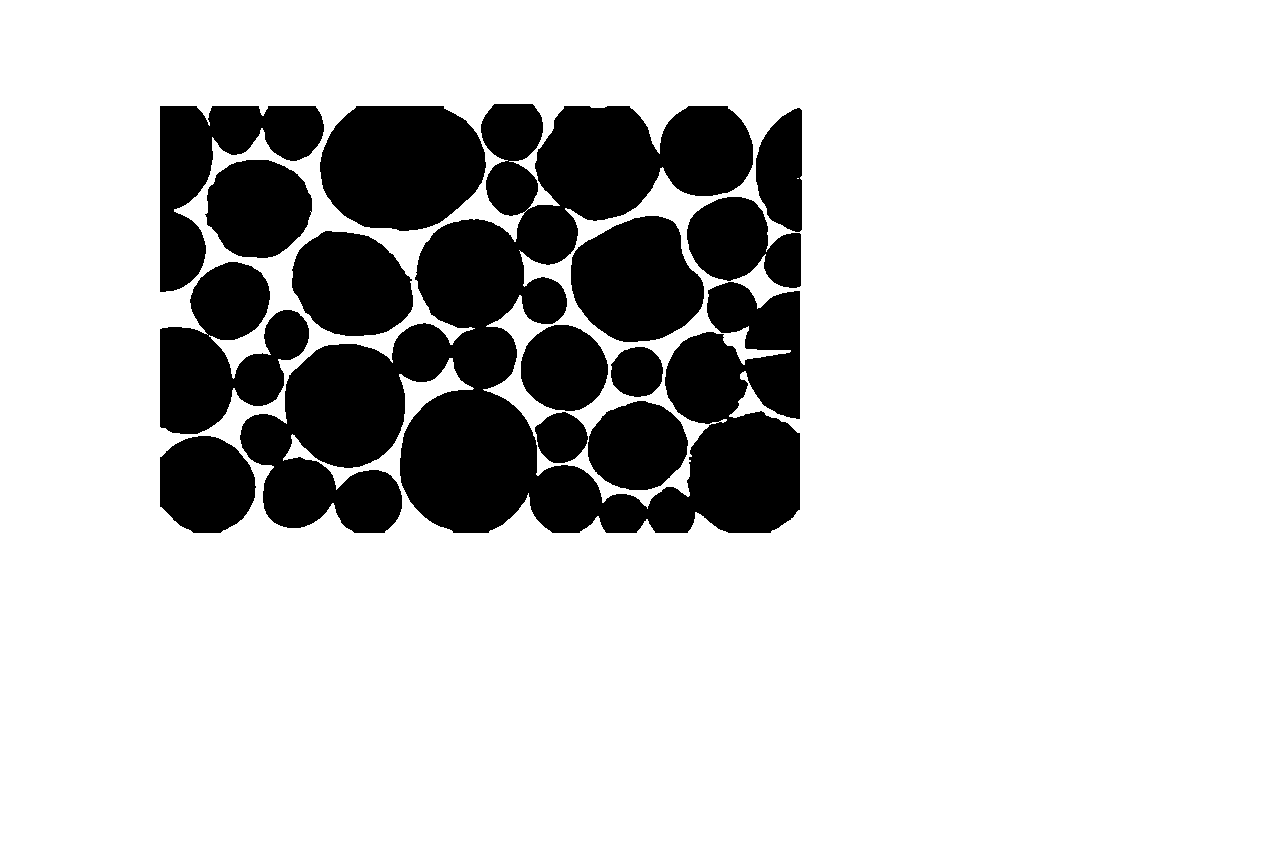

In [80]:
# Filter using contour area and remove small noise
cnts = cv2.findContours(big, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]


for c in cnts:
    area = cv2.contourArea(c)
    if area < 5000:
         cv2.drawContours(big, [c], -1, (0,0,0), -1)
cv2_imshow(big)

In [ ]:
#negative
negative = cv2.bitwise_not(big)
# cv2_imshow(negative)
#Morphological Transformations - erosion

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(negative,kernel,iterations = 2)
cv2_imshow(erosion)

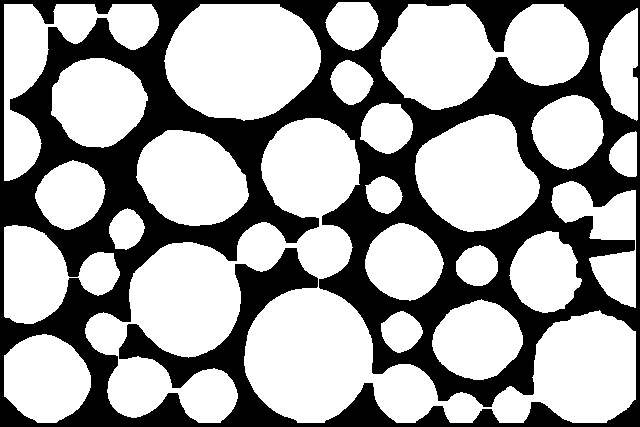

In [89]:
come_back = np.zeros((w,h),np.uint8)
paste(come_back, erosion, (int(-w/4), int(-h/4)))
cv2_imshow(come_back)

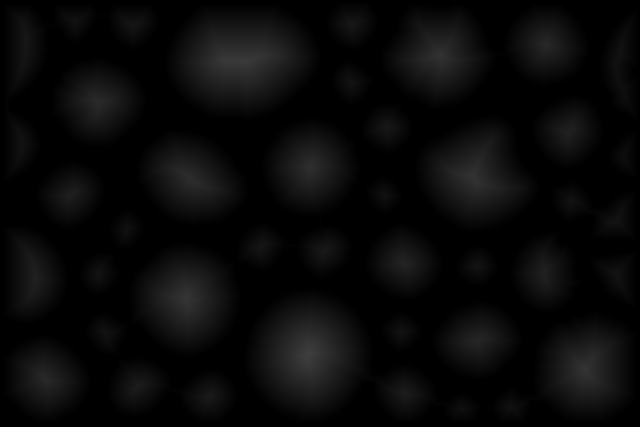

In [90]:


# sure background area
sure_bg = cv2.dilate(come_back,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(come_back,cv2.DIST_L2,5)
cv2_imshow(dist_transform)

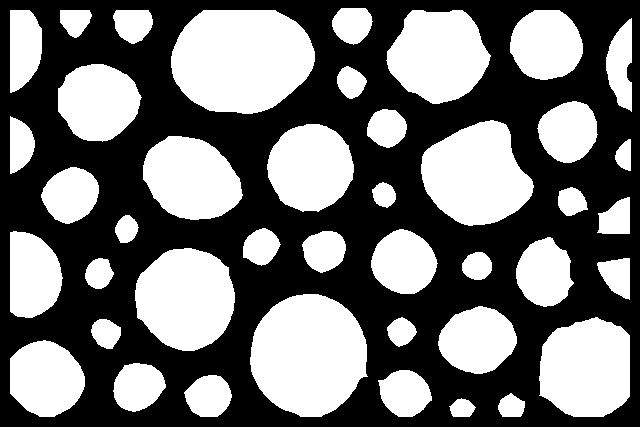

In [97]:
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
cv2_imshow(sure_fg)

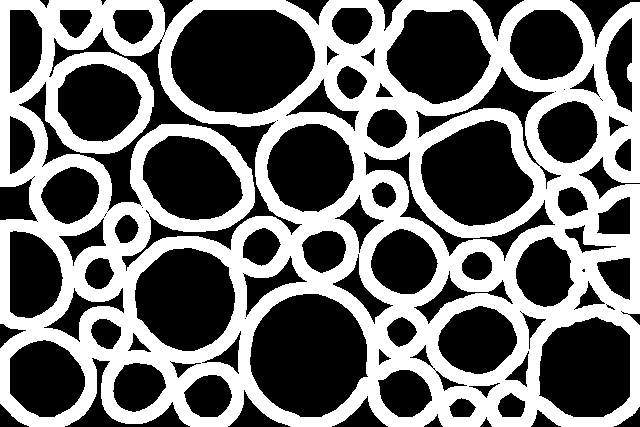

In [99]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2_imshow(unknown)

In [100]:
#Find contour
edges = cv2.Canny(sure_fg, 50,200)
contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

number_of_objects_in_image= len(contours)

print ("The number of objects in this image: ", str(number_of_objects_in_image))

The number of objects in this image:  42


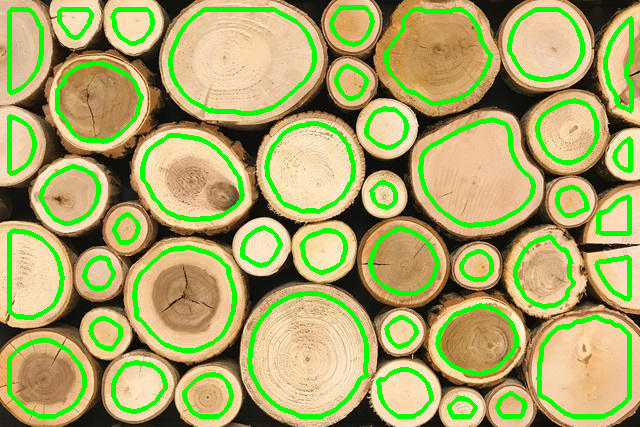

In [101]:
cv2.drawContours(img, contours, -1, (0, 255, 0), 3) 
cv2_imshow(img)

In [ ]:
opening = cv2.morphologyEx(thresh_temp,cv2.MORPH_OPEN,kernel, iterations = 1)
cv2_imshow(opening)
#negative
negative = cv2.bitwise_not(opening)
cv2_imshow(negative)
# Perform the distance transform algorithm
dist = cv2.distanceTransform(negative, cv2.DIST_L2, 5)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
# cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
cv2_imshow(dist)


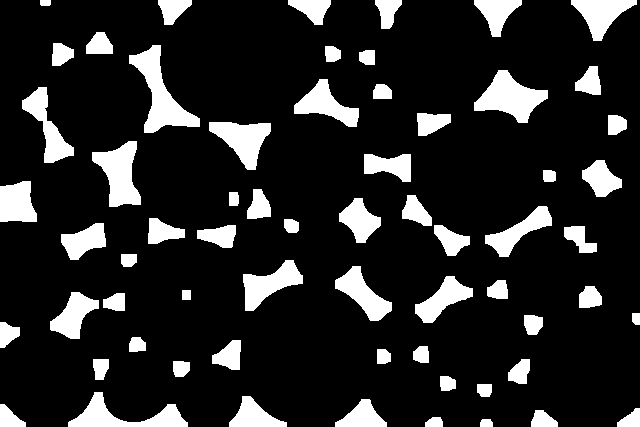

error: ignored

In [21]:
# noise removal
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
cv2_imshow(opening)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [ ]:
copy = thresh

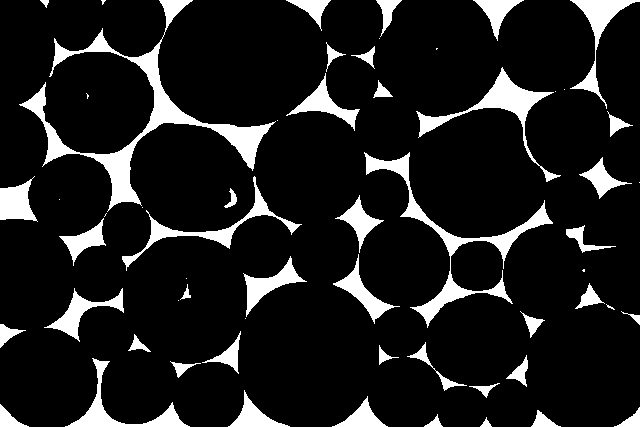

In [ ]:
kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(thresh, kernel, iterations = 1)

cv2_imshow(erosion)

In [ ]:

#Find contour
edges= cv2.Canny(thresh, 50,200)
contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

number_of_objects_in_image= len(contours)

print ("The number of objects in this image: ", str(number_of_objects_in_image))

# for con in contours:
#   (x,y),radius = cv2.minEnclosingCircle(con)
#   center = (int(x),int(y))
#   radius = int(radius)
#   cv2.circle(gray,center,radius,(0,255,0),2)


The number of objects in this image:  47


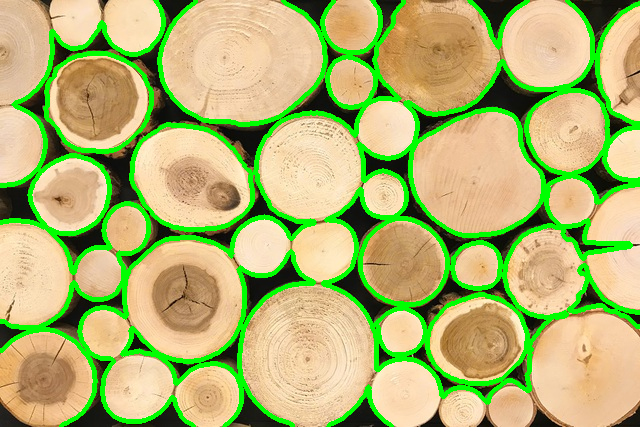

In [ ]:
#ingore this
cv2.drawContours(img, contours, -1, (0, 255, 0), 3) 
cv2_imshow(img)

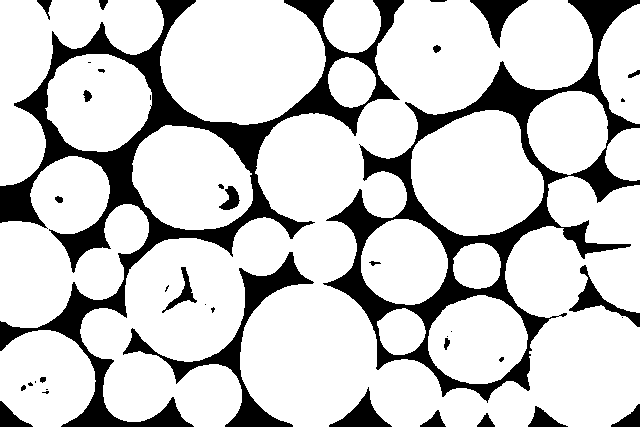

In [ ]:
#negative
negative = cv2.bitwise_not(thresh)
cv2_imshow(negative)

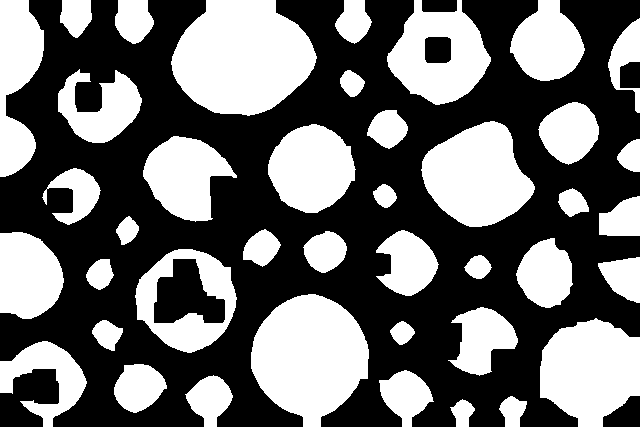

In [ ]:
#Morphological Transformations - erosion

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(negative,kernel,iterations = 2)
cv2_imshow(erosion)

In [ ]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
